## Load MNIST data from Keras
Images are ecoded as Numpy arrays

In [1]:
import keras
from keras.datasets import mnist

Using TensorFlow backend.
/Users/alvinjin/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Training Dataset Shape: {}".format(train_images.shape))
print("The first training image's label: {}".format(train_labels[0]))
print("The first training image:\n {}".format(train_images[0]))


Training Dataset Shape: (60000, 28, 28)
The first training image's label: 5
The first training image:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   9

## First 4 samples in Test dataset

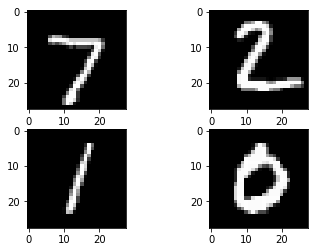

In [3]:
import matplotlib.pyplot as plt
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(test_images[0], cmap='gray')
plt.subplot(222)
plt.imshow(test_images[1], cmap='gray')
plt.subplot(223)
plt.imshow(test_images[2], cmap='gray')
plt.subplot(224)
plt.imshow(test_images[3], cmap='gray')
# show the plot
plt.show()

# Data Preprocessing

## 1. Normalize/Scale data

For a multi-layer feedforward model we must reduce the images down into a vector of pixels. 
Reshape data by flattening 28x28 images to a 1x784 vector for each image.

The pixel values are gray scale between 0 and 255. Normalize it to [0, 1] range by dividing 255.

In [4]:
train_images = train_images.reshape((train_images.shape[0], 28*28))
train_images = train_images.astype('float32')/255

val_images = train_images[:5000]
train_images = train_images[5000:]

test_images = test_images.reshape((test_images.shape[0], 28*28))
test_images = test_images.astype('float32')/255

## 2. One-hot-encoding on Labels
It is good practice to use a one-hot-encoding of the class values, transforming the vector of class integers into a binary matrix.

In [5]:
from keras.utils import to_categorical

print("The First 10 Training Labels:\n {}".format(test_labels[:10]))

train_labels = to_categorical(train_labels)

# Split Validataion set from training set
val_labels = train_labels[:5000]
train_labels = train_labels[5000:]

test_labels = to_categorical(test_labels)

print("After encoding:\n {}".format(test_labels[:10]))

The First 10 Training Labels:
 [7 2 1 0 4 1 4 9 5 9]
After encoding:
 [[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


## Build a Feed-forward Neural Network

In [6]:
from keras import models
from keras import layers

model = models.Sequential()

The input layer consists 28*28=784 neurons

In [7]:
model.add(layers.Dense(units=500, activation='sigmoid', input_shape=(28*28,)))

In [8]:
print(model.output_shape)

(None, 500)


The output layer consists of 10 neurons since we want to classify digits into 10 classes (0 to 9)

In [9]:
model.add(layers.Dense(units=10, activation='softmax'))

In [10]:
print(model.output_shape)

(None, 10)


In [11]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
           loss='categorical_crossentropy',
           metrics=['accuracy']
          )

## Start Neural Network Training

In [12]:
history = model.fit(
    train_images, 
    train_labels,
    epochs=20,
    batch_size=128,
    validation_data=(val_images, val_labels),
    verbose=2
    )

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
 - 5s - loss: 0.4346 - acc: 0.8823 - val_loss: 0.2608 - val_acc: 0.9236
Epoch 2/20
 - 5s - loss: 0.2443 - acc: 0.9285 - val_loss: 0.1958 - val_acc: 0.9444
Epoch 3/20
 - 6s - loss: 0.1883 - acc: 0.9451 - val_loss: 0.1585 - val_acc: 0.9554
Epoch 4/20
 - 6s - loss: 0.1499 - acc: 0.9562 - val_loss: 0.1346 - val_acc: 0.9614
Epoch 5/20
 - 6s - loss: 0.1218 - acc: 0.9649 - val_loss: 0.1141 - val_acc: 0.9658
Epoch 6/20
 - 6s - loss: 0.1006 - acc: 0.9706 - val_loss: 0.1080 - val_acc: 0.9678
Epoch 7/20
 - 5s - loss: 0.0857 - acc: 0.9753 - val_loss: 0.0958 - val_acc: 0.9702
Epoch 8/20
 - 5s - loss: 0.0730 - acc: 0.9789 - val_loss: 0.0921 - val_acc: 0.9718
Epoch 9/20
 - 6s - loss: 0.0632 - acc: 0.9815 - val_loss: 0.0766 - val_acc: 0.9766
Epoch 10/20
 - 6s - loss: 0.0548 - acc: 0.9845 - val_loss: 0.0740 - val_acc: 0.9782
Epoch 11/20
 - 6s - loss: 0.0478 - acc: 0.9862 - val_loss: 0.0755 - val_acc: 0.9768
Epoch 12/20
 - 6s - loss: 0.0417 - a

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5010      
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
_________________________________________________________________


## Evaluation and Test

In [14]:
(loss, accuracy) = model.evaluate(test_images, test_labels)

print("Test Accuracy: {}".format(accuracy))

10000/10000 [==============================] - 1s 143us/step
Test Accuracy: 0.9802


In [15]:
preds = model.predict_classes(test_images[:4])
probs = model.predict_proba(test_images[:4])

print("Predicted Classes:\n {}".format(preds))
print("Predicted Probabilities:\n {}".format(probs))

Predicted Classes:
 [7 2 1 0]
Predicted Probabilities:
 [[  1.51097512e-09   3.89613689e-11   1.61077182e-07   1.39918076e-04
    1.88850727e-10   4.48745929e-09   3.30758099e-14   9.99858856e-01
    9.04090314e-08   1.00180671e-06]
 [  1.05645104e-09   4.08471033e-06   9.99995828e-01   1.18379667e-07
    7.93736946e-16   1.25857706e-08   3.23344618e-09   5.28637921e-16
    1.78487589e-08   2.93990398e-14]
 [  4.79908821e-11   9.99768913e-01   1.05704185e-05   1.80850600e-06
    2.37822846e-07   6.88478281e-07   9.10985023e-07   2.44428375e-05
    1.92398482e-04   8.12274976e-08]
 [  9.99942303e-01   4.61424996e-08   4.36380378e-06   4.87229215e-07
    4.69030329e-06   1.31395339e-07   1.49256957e-05   1.00971602e-05
    8.27289437e-09   2.30121186e-05]]


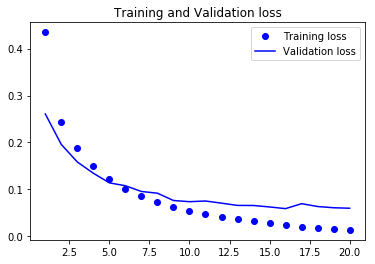

In [16]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

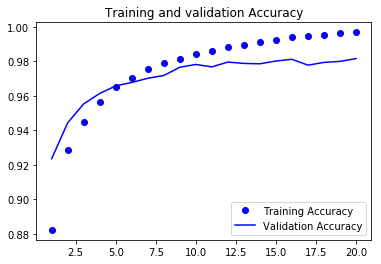

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.legend()

plt.show()